In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

In [2]:
dict = {
    "iter_1": [0, 0, 0, 0, 8, 38, 231, 431, 708],
    "iter_2": [0, 0, 0, 0, 3, 16, 133, 255, 407],
    "iter_3": [0, 0, 0, 0, 6, 49, 110, 110, 275],
    "iter_4": [0, 0, 0, 2, 2, 40, 118, 36, 198],
    "iter_5": [0, 0, 0, 1, 4, 34, 73, 38, 150],
    "iter_6": [0, 0, 0, 0, 15, 33, 64, 6, 118],
    "iter_7": [0, 0, 0, 1, 9, 30, 40, 15, 95],
    "iter_8": [1, 0, 0, 1, 11, 20, 36, 10, 79],
    "iter_9": [0, 0, 0, 2, 11, 20, 30, 4, 67],
    "iter_10": [0, 0, 0, 4, 12, 15, 24, 2, 57],
    "total": [16, 32, 64, 128, 256, 512, 1024, 1024, 3056]
}

df = DataFrame.from_dict(dict, orient='index', columns=["layer_1", "layer_2", "layer_3", "layer_4", "layer_5", "layer_6", "layer_7", "layer_8", "sum"])
df.head()

,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,sum
iter_1,0,0,0,0,8,38,231,431,708
iter_2,0,0,0,0,3,16,133,255,407
iter_3,0,0,0,0,6,49,110,110,275
iter_4,0,0,0,2,2,40,118,36,198
iter_5,0,0,0,1,4,34,73,38,150


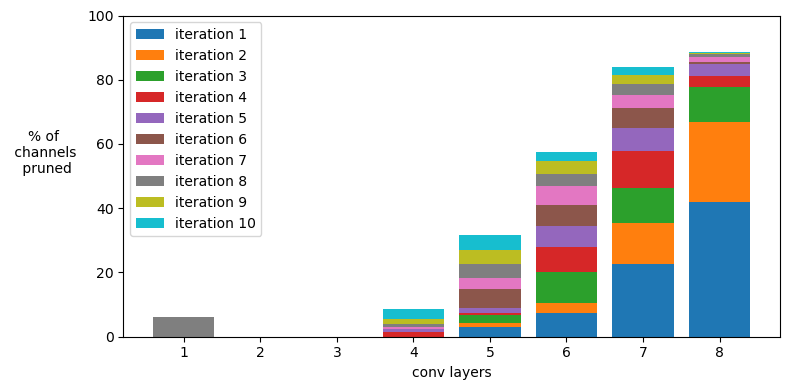

In [66]:
from matplotlib import pyplot as plt

color_dict = {
    1: "tab:blue",
    2: "tab:orange",
    3: "tab:green",
    4: "tab:red",
    5: "tab:purple",
    6: "tab:brown",
    7: "tab:pink",
    8: "tab:gray",
    9: "tab:olive",
    10: "tab:cyan",
    11: "coral"
}

df_plot = df.drop(columns=["sum"])

plt.figure(figsize=(8, 4))

acc_percentages = None

for i in range(len(df_plot.index) - 1):
    percentages = df_plot.iloc[i] / df_plot.iloc[-1]
    
    # plt.bar(df_plot.columns, percentages, bottom=acc_percentages, color="coral", label=f"iter. {i+1}")
    plt.bar(df_plot.columns, percentages, label=f"iteration {i+1}", bottom=acc_percentages, color=color_dict[i+1])
    if i > 0:
        acc_percentages = acc_percentages + percentages
    else:
        acc_percentages = percentages

# plt.legend()
plt.ylabel("% of \n channels \n pruned", rotation=0, labelpad=30)
plt.xlabel('conv layers')
plt.ylim(0, 1)
plt.xticks(ticks=df_plot.columns, labels=[1, 2, 3, 4, 5, 6, 7, 8])
plt.yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=["0", "20", "40", "60", "80", "100"])
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

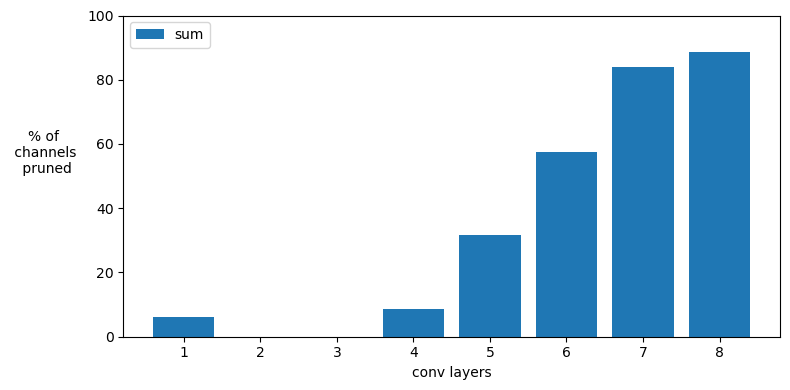

In [59]:


df_plot = df.drop(columns=["sum"])

percentages = (df_plot.sum(axis=0) - df_plot.iloc[-1]) / df_plot.iloc[-1]

plt.figure(figsize=(8, 4))
plt.bar(df_plot.columns, percentages, color="tab:blue", label="sum")
plt.ylabel("% of \n channels \n pruned", rotation=0, labelpad=30)
plt.xlabel('conv layers')
plt.ylim(0, 1)
plt.xticks(ticks=df_plot.columns, labels=[1, 2, 3, 4, 5, 6, 7, 8])
plt.yticks(ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=["0", "20", "40", "60", "80", "100"])
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipykernel_18879/2222338929.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // 5, i % 5].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
/tmp/ipykernel_18879/2222338929.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i // 5, i % 5].set_yticklabels([0, 25, 50, 75, 100])


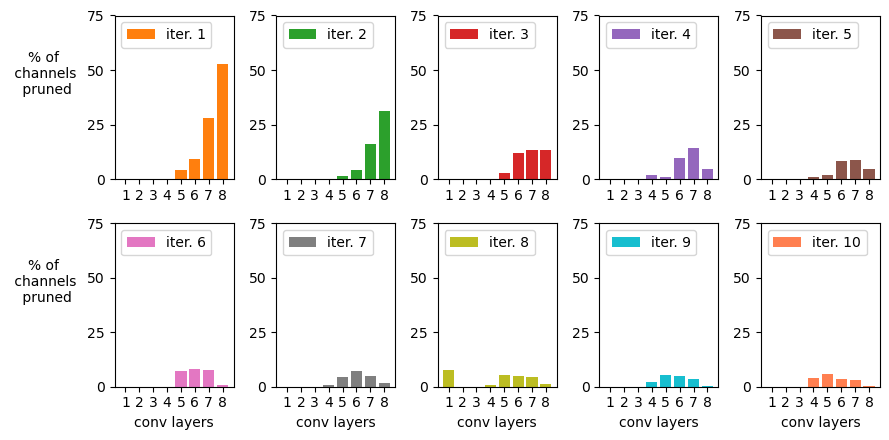

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(9, 4.5))

df_plot = df.drop(columns=["sum"])

for i in range(len(df.index) - 1):
    # col = (np.random.random(), np.random.random(), np.random.random())
    ax[i // 5, i % 5].bar(df_plot.columns, df_plot.iloc[i] / df_plot.iloc[-1], label=f"iter. {i+1}", color=color_dict[i+2])
    ax[i // 5, i % 5].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax[i // 5, i % 5].set_yticklabels([0, 25, 50, 75, 100])
    ax[i // 5, i % 5].legend(loc="upper left")
    ax[i // 5, i % 5].set_ylim(0, 0.6)
    if i % 5 == 0: ax[i // 5, i % 5].set_ylabel('% of \n channels \n pruned', rotation=0, labelpad=30)
    if i // 5 != 0: ax[i // 5, i % 5].set_xlabel('conv layers')

plt.tight_layout()
plt.show()

/tmp/ipykernel_18879/2790308840.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i % 5, i // 5].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
/tmp/ipykernel_18879/2790308840.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i % 5, i // 5].set_yticklabels([0, 25, 50, 75, 100])


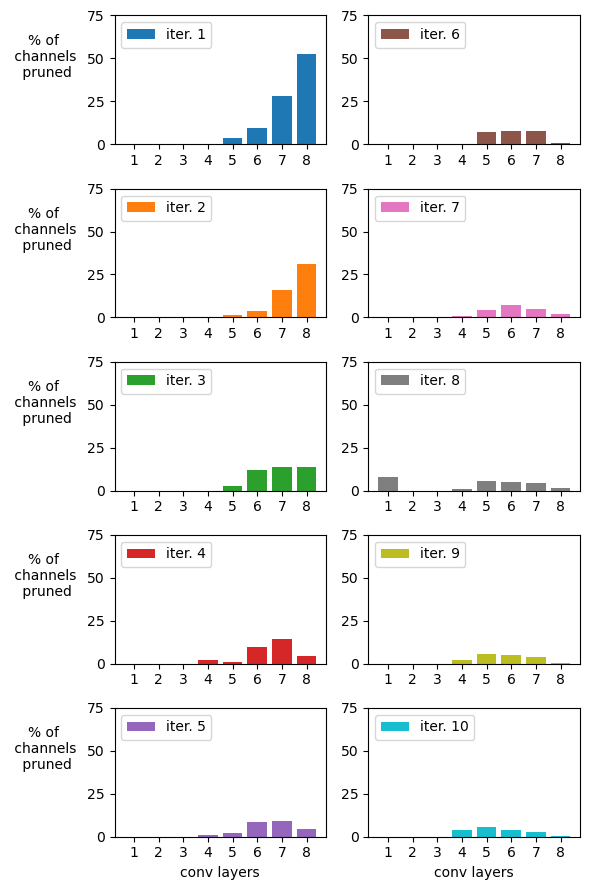

In [65]:
fig, ax = plt.subplots(5, 2, figsize=(6, 9))

df_plot = df.drop(columns=["sum"])

for i in range(len(df.index) - 1):
    # col = (np.random.random(), np.random.random(), np.random.random())
    ax[i % 5, i // 5].bar(df_plot.columns, df_plot.iloc[i] / df_plot.iloc[-1], label=f"iter. {i+1}", color=color_dict[i+1])
    ax[i % 5, i // 5].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax[i % 5, i // 5].set_yticklabels([0, 25, 50, 75, 100])
    ax[i % 5, i // 5].legend(loc="upper left")
    ax[i % 5, i // 5].set_ylim(0, 0.6)
    if i // 5 == 0: ax[i % 5, i // 5].set_ylabel('% of \n channels \n pruned', rotation=0, labelpad=30)
    if i % 5 == 4: ax[i % 5, i // 5].set_xlabel('conv layers')

plt.tight_layout()
plt.show()